<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/3_What_are_the_factors_that_sell_a_car%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
Crankshaft List, a prominent platform for trading vehicles, accumulates a vast array of data through its website on a daily basis. As an analyst at Crankshaft List, the task at hand is to delve into the data collected over recent years to discern the factors influencing the pricing of vehicles. This involves a comprehensive analysis of various parameters such as price, age of the vehicle at the time of listing, mileage, cylinder count, and condition. By uncovering insights from this data, we aim to provide valuable information to both sellers and buyers, facilitating informed decision-making in the vehicle marketplace.

## Objective:
The primary objective of this data analysis project is to identify the key factors that influence the pricing of vehicles listed on Crankshaft List. This involves several stages, including data preprocessing, exploratory data analysis, and inference drawing. Specifically, we aim to achieve the following objectives:

1. Preprocess the data by handling missing values and converting data types where necessary.
2. Compute additional features such as the day of the week, month, and year of listing, the age of the vehicle at the time of listing, and the average annual mileage.
3. Perform exploratory data analysis (EDA) to understand the distribution of various parameters such as price, vehicle age, mileage, and condition.
4. Identify outliers and assess their impact on the data distribution through histograms.
5. Analyze the duration of listings and its implications, including determining typical listing durations and identifying factors influencing quick or prolonged listings.
6. Investigate the relationship between the number of listings and the average prices across different vehicle types.
7. Determine the primary factors influencing vehicle prices, considering popular vehicle types, and analyze their dependence on variables such as age, mileage, condition, transmission type, and color.

## Stages:

1. Data Preprocessing:
  * Handle missing values and convert data types as necessary.
  * Add additional features such as the day of the week, month, and year of listing, the age of the vehicle at the time of listing, and the average annual mileage.
  * Convert the 'condition' column to a numeric scale.
2. Exploratory Data Analysis (EDA):
  * Create histograms to explore the distributions of price, vehicle age, mileage, cylinder count, and condition.
  * Analyze the impact of outliers on histograms and decide on outlier treatment.
  * Investigate the duration of listings and calculate average and median durations.
  * Determine factors influencing listing duration and its implications.
3. Analysis of Listing Counts and Average Prices:
  * Examine the relationship between the number of listings and the average prices across different vehicle types.
  * Identify the most popular vehicle types and analyze their pricing trends.
4. Factors Influencing Vehicle Prices:
  * Investigate the factors influencing vehicle prices, including age, mileage, condition, transmission type, and color.
  * Create box plots for categorical variables and scatter plots for numerical variables to visualize their impact on prices.
5. Conclusion:

  Through rigorous data analysis, we aim to uncover insights that shed light on the intricate dynamics of the vehicle marketplace. By identifying the factors influencing vehicle prices and understanding listing behaviors, we provide valuable guidance to both sellers and buyers. This comprehensive analysis equips stakeholders with the knowledge needed to make informed decisions, ultimately enhancing the efficiency and transparency of vehicle transactions on Crankshaft List.

# 1. Data Preprocessing

Open data related to car sales, then study the data.

Load the libraries you think are needed for this project. You will probably realize that you need additional libraries as you work on the project and that is normal.

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/3.  What are the factors that sell a car?/vehicles_us (2).csv')

In [4]:
# Let's see how many rows and columns our data set contains
df.shape

(51525, 13)

In [5]:
# Display general information/summary about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
# Displays sample data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
# Describe from general information
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
# View data types
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [9]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

**Exploring Preliminary Data Summary:**
1. Dataset Overview:
  * The dataset contains 51,525 entries and 13 columns.
  * Columns include features such as price, model year, model, condition, cylinders, fuel type, odometer reading, transmission type, vehicle type, paint color, whether it's 4-wheel drive, date posted, and days listed.
  * Data types include integers, floats, and objects (strings).
2. Missing Values:
  * The columns with missing values and their respective percentages of missingness are as follows:
    * 'is_4wd': 50.37%
    * 'paint_color': 17.99%
    * 'odometer': 15.32%
    * 'cylinders': 10.21%
    * 'model_year': 7.02%
  * The highest percentage of missing values is in the 'is_4wd' column, followed by 'paint_color'.
3. Data types:
  * Model Year (model_year):
    * Current Data Type: float64
    * Suggested Data Type: int64
    * Reason: Model year should be represented as an integer, as it denotes a specific year.
  * Cylinders (cylinders):
    * Current Data Type: float64
    * Suggested Data Type: int64
    * Reason: The number of cylinders in a vehicle should be represented as an integer, as fractional cylinders are not applicable.
  * Is 4WD (is_4wd):
    * Current Data Type: float64
    * Suggested Data Type: bool
    * Reason: The "is_4wd" column presumably indicates whether the vehicle is four-wheel drive or not. Converting it to a boolean data type (True/False) would provide clearer representation.
  * Date Posted (date_posted):
    * Current Data Type: object (string)
    * Suggested Data Type: datetime64
    * Reason: Dates should be represented as datetime objects to facilitate temporal analysis and operations.
  * By correcting these data types, the dataset will be more consistent and suitable for further analysis.

4. Data Integrity:
  * There are no apparent data integrity issues observed in the preliminary exploration. However, further analysis and preprocessing are required to handle missing values and ensure consistency in data types.
5. Initial Observations:
  * The dataset encompasses a diverse range of vehicles with varying attributes such as price, age, mileage, condition, and features.
  * Significant missing values are present, particularly in the 'is_4wd' and 'paint_color' columns, which may require imputation or further investigation.
* Descriptive statistics reveal insights into the distribution of numerical variables, highlighting potential outliers and patterns in the data.

Overall, the preliminary exploration provides a foundational understanding of the dataset, laying the groundwork for further analysis and preprocessing to extract meaningful insights into the factors influencing vehicle sales.


## Handle missing values and convert data types as necessary.

After studying the missing values for each column in more detail we will determine what to do with these values based on the hypothesis.

Not all missing values affect your research. For example, missing values in the `is_4wd` and `paint_color` columns are not that important. We simply replace it with a clear marker. For the `is_4wd` column we will replace it with the value '0' and change it to the boolean data type. And for the `paint_color` column we will replace the missing values with the 'Unknow' marker for now.

However, the values in the `odometer`, `cylinders`, and `model_year` columns will affect the results of our analysis. The `odometer`, `cylinders`, and `model_year` columns are quantitative variables. Missing values for these variables must be processed differently and filled with representative values. The mean and median of the dataset are often used for these values. Considering that we don't see whether there are significant outliers in the data, we can use the median as our representative value to replace the missing value.



In [10]:
def fill_missing_value_median (dataframe, agg_column, value_column):

  grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
  size = len(grouped_values)

  for i in range(size):
    group = grouped_values[agg_column][i]
    value = grouped_values[value_column][i]
    dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
  return dataframe

In [11]:
def fill_missing_value_mean (dataframe, agg_column, value_column):

  grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
  size = len(grouped_values)

  for i in range(size):
    group = grouped_values[agg_column][i]
    value = grouped_values[value_column][i]
    dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
  return dataframe

In [12]:
df['is_4wd'].fillna(0)
df['is_4wd'] = df['is_4wd'].astype('bool')

In [13]:
df[df['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,True,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,True,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,True,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,True,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,True,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,True,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,True,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,True,2018-12-27,37


In [14]:
df['model_year'].median()

2011.0

In [15]:
df['model_year'].fillna(2011)

0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

In [16]:
df.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [17]:
df['paint_color'] = df['paint_color'].fillna('unknow')

In [18]:
new_df = fill_missing_value_median(df, 'condition', 'odometer')

In [19]:
new_df = fill_missing_value_median(new_df, 'model', 'cylinders')
new_df = fill_missing_value_median(new_df, 'model', 'model_year')

In [20]:
new_df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

Since our data is now more or less complete, we will correct the data types.

In [21]:
new_df['date_posted'] = pd.to_datetime(new_df['date_posted'])

In [22]:
new_df['model_year'] = new_df['model_year'].astype('int')
new_df['cylinders'] = new_df['cylinders'].astype('int')
new_df['odometer'] = new_df['odometer'].astype('int')

In [23]:
new_df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [24]:
new_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknow,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknow,True,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28


## Add additional features such as the day of the week, month, and year of listing, the age of the vehicle at the time of listing, and the average annual mileage.

Added factors to the data to make our analysis easier.

In [25]:
# Add the time and date values for when the ad was shown
new_df['day_posted'] = new_df['date_posted'].dt.day
new_df['month_posted'] = new_df['date_posted'].dt.month
new_df['year_posted'] = new_df['date_posted'].dt.year


In [26]:
# Add the age of the vehicle when the ad is shown
new_df['age_car'] = new_df['year_posted'] - new_df['model_year']

In [27]:
new_df.loc[new_df['age_car']==0, 'age_car'] = 1

In [28]:
new_df.loc[new_df['age_car']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car


In [29]:
# Add the average mileage of the vehicle per year
new_df['avg_odometer'] = new_df['odometer'] / new_df['age_car']

In [30]:
new_df['avg_odometer'] = new_df['avg_odometer'].astype('int')

## Convert the 'condition' column to a numeric scale.

In [31]:
# It might help to replace the value in the 'condition' column with something that can be more easily manipulated
def get_condition(cell):
    if cell == 'new':
        return 5
    elif cell == 'like new':
        return 4
    elif cell == 'excellent':
        return 3
    elif cell == 'good':
        return 2
    elif cell == 'fair':
        return 1
    else:
        return 0

In [32]:
new_df['condition_category'] = new_df['condition'].apply(get_condition)

In [33]:
new_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer,condition_category
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknow,True,2018-06-23,19,23,6,2018,7,20714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,2,2019,6,18333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknow,True,2019-03-22,9,22,3,2019,16,11350,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2,4,2019,2,40451,3


Now, our data is ready for analysis. Come on, let's try checking again. It is useful to see what exactly we will use for analysis.

In [34]:
# Display general information/summary about the DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  day_posted          51525 non-null  int64     

In [35]:
# Displays sample data
new_df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer,condition_category
23655,12000,2008,ford f350 super duty,good,8,diesel,189000,automatic,pickup,white,True,2019-01-03,10,3,1,2019,11,17181,2
12794,13500,2008,chevrolet silverado,excellent,8,gas,165581,automatic,truck,unknow,True,2019-04-16,55,16,4,2019,11,15052,3
31286,16900,1970,chevrolet corvette,good,8,gas,110000,automatic,convertible,yellow,True,2018-11-25,45,25,11,2018,48,2291,2
9970,29500,2017,chevrolet silverado 1500,excellent,8,gas,51985,automatic,truck,white,True,2018-09-11,16,11,9,2018,1,51985,3
23432,55950,2013,chevrolet corvette,like new,8,gas,3500,manual,convertible,white,True,2018-10-18,17,18,10,2018,5,700,4


# 2. Exploratory Data Analysis (EDA)

## Create histograms to explore the distributions of price, vehicle age, mileage, cylinder count, and condition.
Choosing the right approach to studying the parameters below, pay attention to how outliers affect the shape and readability of the histogram.

The parameters are:
- Price
- Vehicle age when the ad is displayed
- Mileage
- Number of cylinders
- Condition

<Axes: >

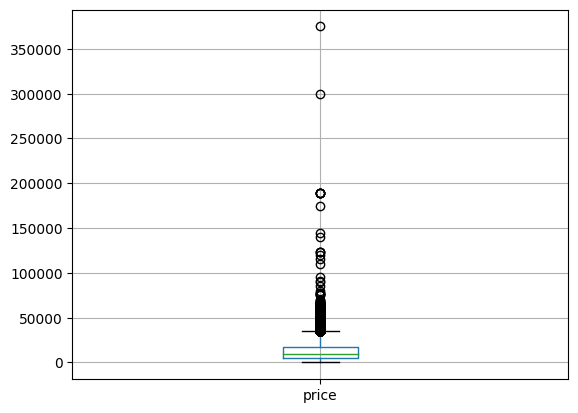

In [36]:
# Use boxplot and histogram for price column
new_df.boxplot('price')



array([[<Axes: title={'center': 'price'}>]], dtype=object)

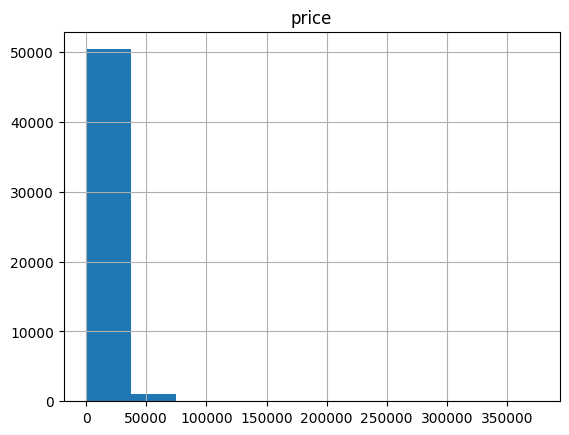

In [37]:
new_df.hist('price')

Judging from the boxplot and histogram in the `price` column, there are vehicle price values that are far from the value groups. We have to determine the lower and upper limit values to find out if the values that are far from this group are outliers or not.

<Axes: >

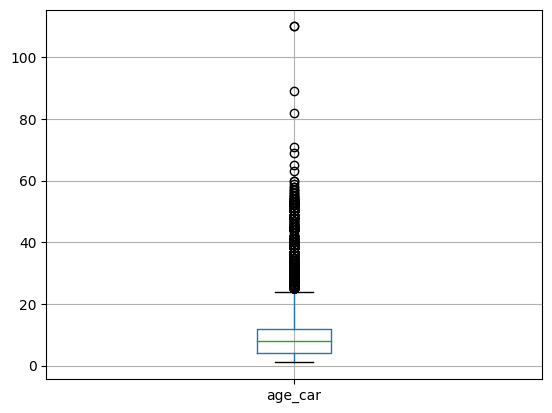

In [38]:
# Use boxplot and histogram for age_car column
new_df.boxplot('age_car')


array([[<Axes: title={'center': 'age_car'}>]], dtype=object)

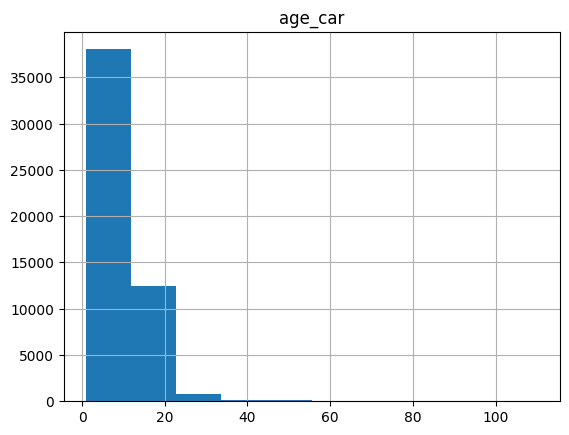

In [39]:
new_df.hist('age_car')

Judging from the boxplot and histogram in the `age_car` column, there is a value for the age of the vehicle when the ad was displayed which is far from the value column. We have to determine the lower and upper limit values to find out if the values that are far from this group are outliers or not.

<Axes: >

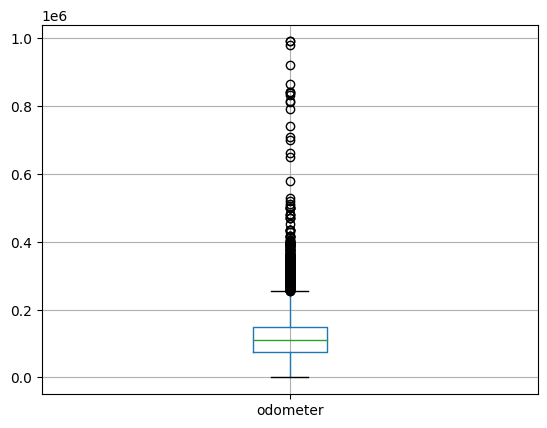

In [40]:
# Use boxplot and histogram for odometer column
new_df.boxplot('odometer')

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

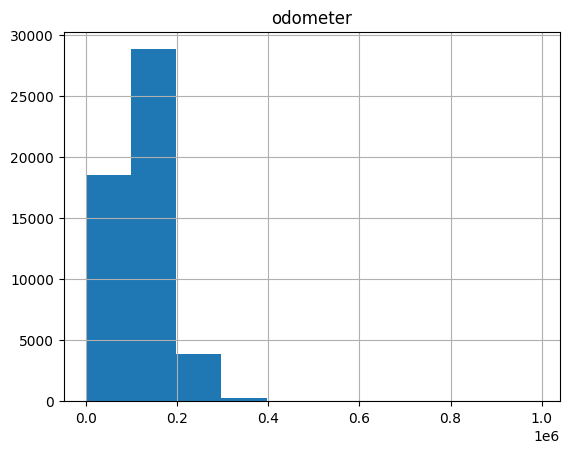

In [41]:
new_df.hist('odometer')

Judging from the boxplot and histogram in the `odometer` column, there are vehicle mileage values that are far from the value column. We have to determine the lower and upper limit values to find out if the values that are far from this group are outliers or not.

<Axes: >

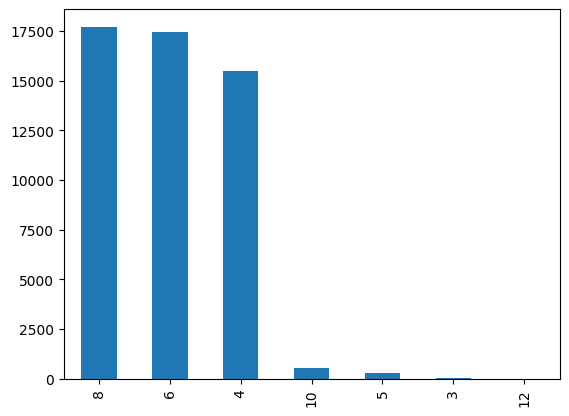

In [42]:
# use bar charts, boxplots and histograms for the cylinders column
new_df['cylinders'].value_counts().plot(kind='bar')


<Axes: >

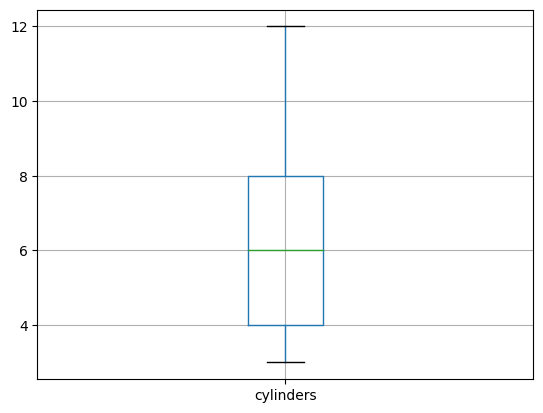

In [43]:
new_df.boxplot('cylinders')

array([[<Axes: title={'center': 'cylinders'}>]], dtype=object)

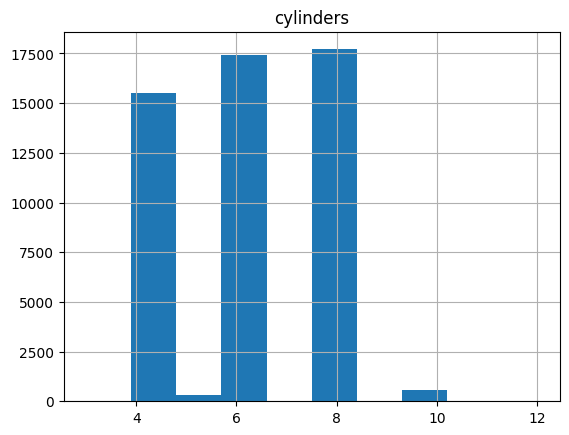

In [44]:
new_df.hist('cylinders')

Judging from the bar chart, boxplot, and histogram in the `cylinders` column there are no cylinder numbers that are far from the value group.

<Axes: >

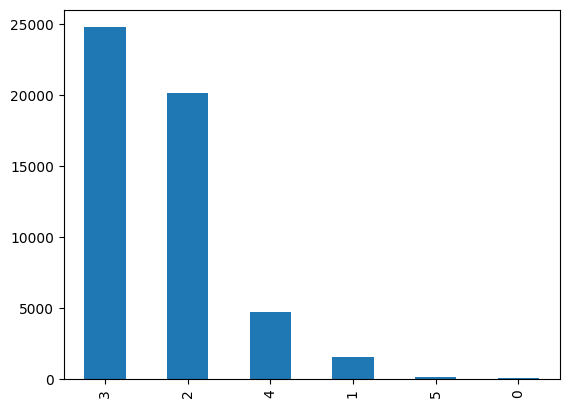

In [45]:
# use bar charts, boxplots and histograms for the condition_category column
new_df['condition_category'].value_counts().plot(kind='bar')


<Axes: >

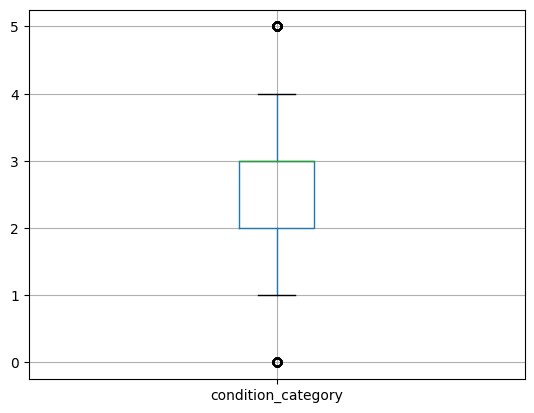

In [46]:
new_df.boxplot('condition_category')

array([[<Axes: title={'center': 'condition_category'}>]], dtype=object)

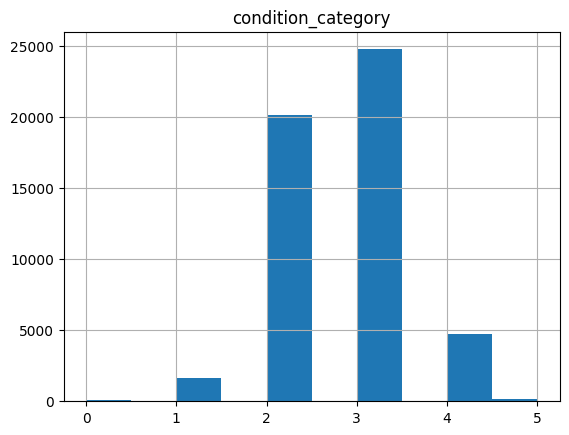

In [47]:
new_df.hist('condition_category')

Judging from the bar chart, boxplot, and histogram in the condition category column, there is no number of condition categories that are far from the value group.

## Analyze the impact of outliers on histograms and decide on outlier treatment.

Based on the results above, what columns may contain outliers are the `price`, `age_car`, and `odometer` columns. We will create a data frame without these outliers. Outliers can be identified by determining lower/upper limits for the normal range of values.

In [48]:
new_df.describe()

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer,condition_category
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115199.007278,39.55476,15.449491,6.628491,2018.307462,8.555672,18930.508569,2.637535
std,10040.803015,6.099381,1.657457,60484.868232,28.20427,8.736521,3.474134,0.461447,6.057829,16268.579554,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,8.000000,14982.000000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


In [49]:
# Determine the lower limit for outliers and the upper limit for outlier prices
Q1_price = new_df['price'].quantile(0.25)
Q3_price = new_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_whisker_price = Q1_price - (1.5 * IQR_price)
upper_whisker_price = Q3_price + (1.5 * IQR_price)
print('Lower Whisker Price:', lower_whisker_price)
print('Upper whisker Price:', upper_whisker_price)

Lower Whisker Price: -12758.5
Upper whisker Price: 34597.5


In [50]:
# Store data without outliers in a separate DataFrame
new_df_2 = new_df[(new_df['price']>lower_whisker_price) &
                  (new_df['price']<upper_whisker_price)].reset_index(drop=True)


In [51]:
# Determine the lower limit for outliers and the upper limit for outlier odometer
Q1_odometer = new_df_2['odometer'].quantile(0.25)
Q3_odometer = new_df_2['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lower_whisker_odometer = Q1_odometer - (1.5 * IQR_odometer)
upper_whisker_odometer = Q3_odometer + (1.5 * IQR_odometer)
print('Lower Whisker Odometer:', lower_whisker_odometer)
print('Upper whisker Odometer:', upper_whisker_odometer)

Lower Whisker Odometer: -25184.0
Upper whisker Odometer: 254104.0


In [52]:
new_df_3 = new_df_2[(new_df_2['odometer']>lower_whisker_odometer) &
                    (new_df_2['odometer']<upper_whisker_odometer)].reset_index(drop=True)

In [53]:
# Determine the lower limit for outliers and the upper limit for outlier age
Q1_age = new_df_3['age_car'].quantile(0.25)
Q3_age = new_df_3['age_car'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_whisker_age = Q1_age - (1.5 * IQR_age)
upper_whisker_age = Q3_age + (1.5 * IQR_age)
print('Lower Whisker Age car:', lower_whisker_age)
print('Upper whisker Age car:', upper_whisker_age)

Lower Whisker Age car: -8.0
Upper whisker Age car: 24.0


In [54]:
new_df_4 = new_df_3[(new_df_3['age_car']>lower_whisker_age) &
                    (new_df_3['age_car']<upper_whisker_age)].reset_index(drop=True)

In [55]:
new_df_4.describe()

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer,condition_category
count,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000,48104.000000
mean,11261.263201,2010.135228,6.049767,113494.336937,39.535444,15.453892,6.633087,2018.306586,8.204224,18732.602507,2.637930
std,7830.900417,4.968063,1.657068,52951.217313,28.202702,8.741019,3.472738,0.461081,4.930302,15404.857296,0.697536
min,1.000000,1995.000000,3.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,78500.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10545.000000,2.000000
50%,8995.000000,2011.000000,6.000000,111716.000000,33.000000,15.000000,7.000000,2018.000000,7.000000,14890.000000,3.000000
75%,15995.000000,2014.000000,8.000000,146000.000000,53.000000,23.000000,10.000000,2019.000000,11.000000,21520.250000,3.000000
max,34595.000000,2019.000000,12.000000,254100.000000,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000,5.000000


We will use the filtered data to create a new graph and compare it with previous data (which contains outliers).

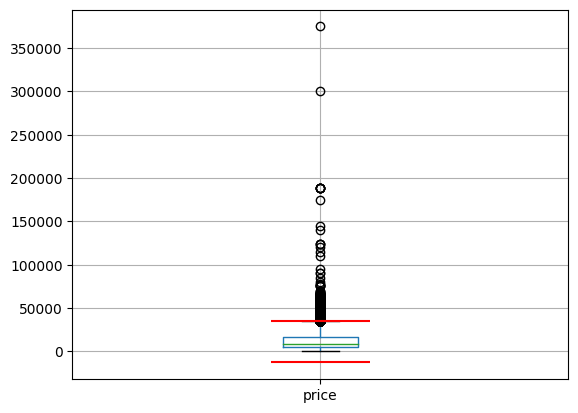

In [56]:
# Previous parameters
new_df.boxplot('price')
plt.hlines(y=[lower_whisker_price, upper_whisker_price], xmin=0.9, xmax=1.1, color='red')

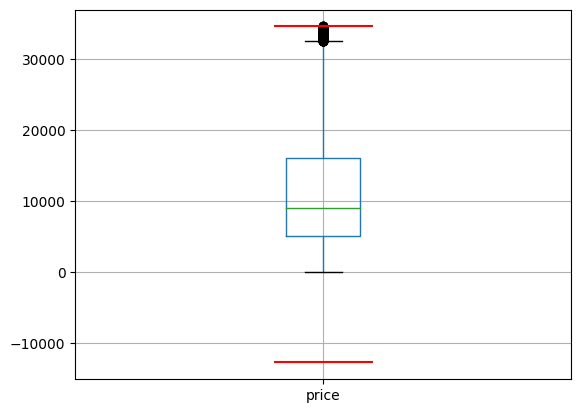

In [57]:
# Parameters without outliners
new_df_4.boxplot('price')
plt.hlines(y=[lower_whisker_price, upper_whisker_price], xmin=0.9, xmax=1.1, color='red')

After comparing the boxplot in the `price` column with and without outliner. We can now understand the data properly, avoid distortion of the analysis, and ensure the analysis is valid.

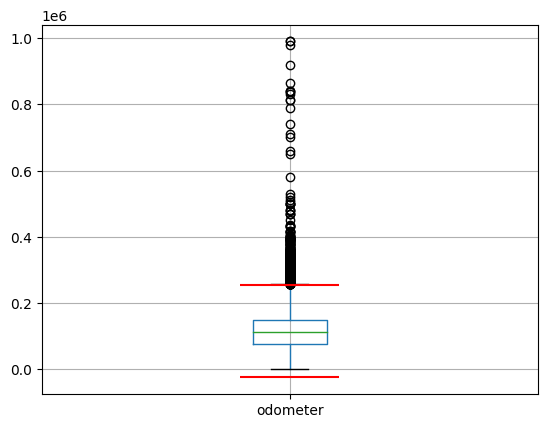

In [58]:
# Previous parameters
new_df.boxplot('odometer')
plt.hlines(y=[lower_whisker_odometer, upper_whisker_odometer], xmin=0.9, xmax=1.1, color='red')

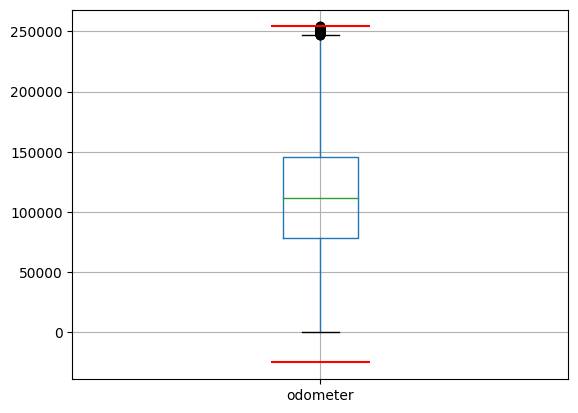

In [59]:
# Parameters without outliners
new_df_4.boxplot('odometer')
plt.hlines(y=[lower_whisker_odometer, upper_whisker_odometer], xmin=0.9, xmax=1.1, color='red')

After comparing the boxplot in the `odometer` column with and without outliner. We can now understand the data properly, avoid distortion of the analysis, and ensure the analysis is valid.

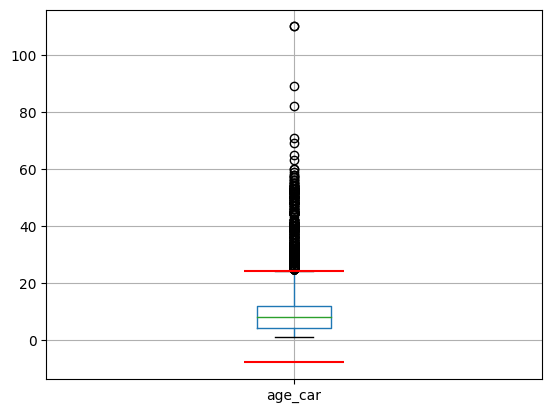

In [60]:
# Previous parameters
new_df.boxplot('age_car')
plt.hlines(y=[lower_whisker_age, upper_whisker_age], xmin=0.9, xmax=1.1, color='red')

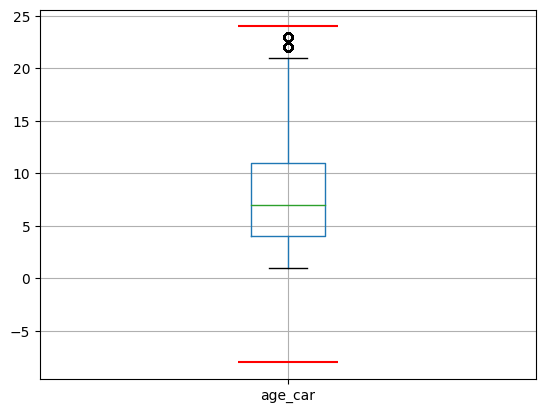

In [61]:
# Parameters without outliners
new_df_4.boxplot('age_car')
plt.hlines(y=[lower_whisker_age, upper_whisker_age], xmin=0.9, xmax=1.1, color='red')

After comparing the boxplot in the `age_car` column with and without outliner. We can now understand the data properly, avoid distortion of the analysis, and ensure the analysis is valid.

## Investigate the duration of listings and calculate average and median durations.

Learn how many days the ad was shown (`days_listed`). Calculate the mean and median. Explains how long an ad is generally displayed. This is done so that we can determine when an ad is removed quickly and when an ad is displayed for a very long time.

In [62]:
new_df_4['days_listed'].describe()

count    48104.000000
mean        39.535444
std         28.202702
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [63]:
new_df_4['days_listed'].median()

33.0

The average time an ad is displayed is 39 days. Meanwhile, the median number of advertisements shown is 33 days. The longest ad was shown, namely 271 days, while the fastest was 0 days.

## Determine factors influencing listing duration and its implications.

<Axes: >

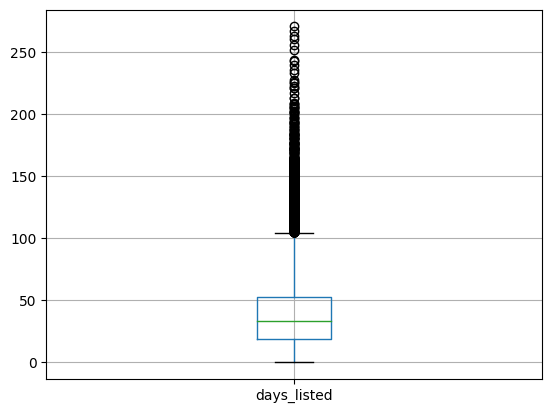

In [64]:
new_df_4.boxplot('days_listed')

In [65]:
Q1_days = new_df_4['days_listed'].quantile(0.25)
Q3_days = new_df_4['days_listed'].quantile(0.75)
IQR_days = Q3_days - Q1_days
lower_whisker_days = Q1_days - (1.5 * IQR_days)
upper_whisker_days = Q3_days + (1.5 * IQR_days)

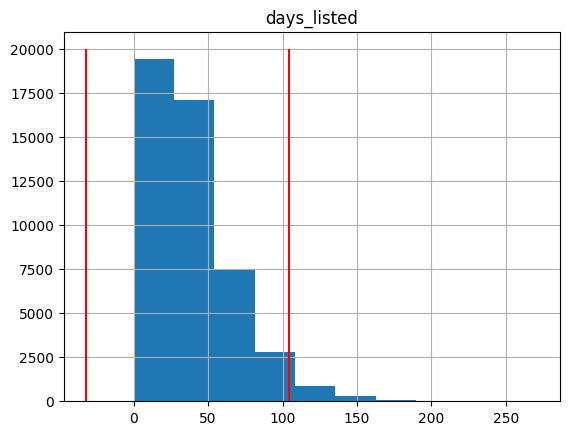

In [66]:
new_df_4.hist('days_listed')
plt.vlines(x=[lower_whisker_days, upper_whisker_days], ymin=0, ymax=20000, colors='red')

We can draw the following conclusions regarding the factors influencing listing duration and its implications:

1. Duration Distribution:
  * The interquartile range (IQR) of 34.0 suggests that the middle 50% of the listing durations fall within this range.
  * The median duration could lie close to the center of the IQR (between Q1 and Q3), indicating the typical duration for listings.
2. Factors Influencing Duration:
  * Variables such as vehicle price, condition, type, and other attributes may influence listing duration.
  * Higher-priced vehicles or those in better condition may have shorter listing durations, reflecting higher demand.
  * On the other hand, vehicles with specific attributes or conditions may take longer to sell, leading to extended listing durations.
3. Implications:
  * Understanding the factors influencing listing duration can help sellers set appropriate expectations regarding the time it may take to sell their vehicles.
  * Sellers may need to adjust their pricing or marketing strategies based on the expected duration of listing.
  * For buyers, knowing the typical listing duration can provide insights into market dynamics and the availability of certain types of vehicles.

In conclusion, analyzing the distribution of listing durations and identifying factors influencing them can offer valuable insights into the dynamics of the vehicle marketplace and help stakeholders make informed decisions.

# 3. Analysis of Listing Counts and Average Prices

## Examine the relationship between the number of listings and the average prices across different vehicle types.


In [67]:
agg_group_1 = new_df_4.groupby(['type']).agg({
    'price' : 'mean',
    'days_listed' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'days_listed' : 'count_days_listed'
}).sort_values(by='count_days_listed', ascending=False)

In [68]:
agg_group_1

,avg_price,count_days_listed
type,,
sedan,6986.723672,11993
SUV,10481.406142,11853
truck,15197.498277,11026
pickup,15141.399936,6231
coupe,13548.858706,2010
wagon,8999.886059,1492
mini-van,8072.185802,1141
hatchback,6842.271912,1004
van,8896.221837,577


Based on the provided data on the average prices and the number of listings across different vehicle types:
1. Relationship Analysis:
  * There appears to be a variation in the average prices across different vehicle types. For example:
    * Trucks and pickups have the highest average prices, with $15,197.50 and $15,141.40 respectively.
    * Buses have the highest average price among all vehicle types, despite having a smaller number of listings, indicating a niche market.
  * Hatchbacks and sedans have relatively lower average prices compared to trucks and pickups, with $6,842.27 and $6,986.72 respectively.
2. Implications:
  * The number of listings varies significantly across vehicle types, with sedans and SUVs having the highest number of listings, followed by trucks and pickups.
  * Higher average prices for certain vehicle types may indicate higher demand or perceived value by buyers.
  * Sellers may consider adjusting their pricing strategies based on the average prices observed within their vehicle category to remain competitive in the market.
  * Buyers may use this information to assess the affordability and value proposition of different vehicle types based on their budget and preferences.
3. Market Dynamics:
  * The observed differences in average prices and listing counts highlight the diverse preferences and market dynamics within the vehicle marketplace.
  * Factors such as vehicle type, brand, condition, and features influence pricing and demand, leading to variations across different segments of the market.
  
In conclusion, analyzing the relationship between the number of listings and average prices across different vehicle types provides valuable insights into market trends and consumer preferences. Understanding these dynamics can inform pricing strategies for sellers and aid buyers in making informed decisions based on their preferences and budget constraints.

## Identify the most popular vehicle types and analyze their pricing trends.

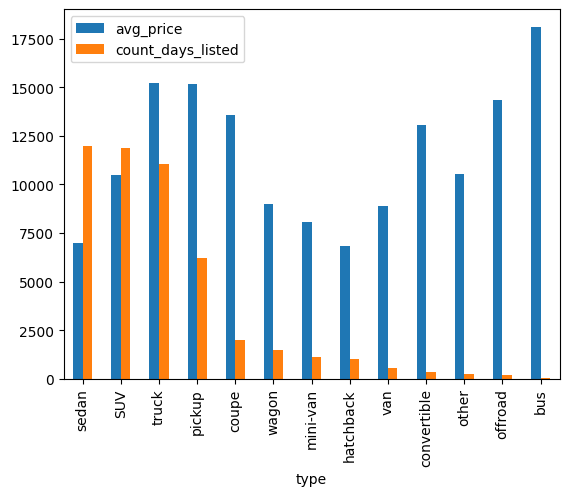

In [69]:
agg_group_1.plot(kind='bar');


Based on the provided average prices and listing counts for various vehicle types, here's an analysis of the most popular vehicle types and their pricing trends:
1. Most Popular Vehicle Types:
  * Sedans and SUVs are the most popular vehicle types, with 11,993 and 11,853 listings, respectively. Their popularity can be attributed to their versatility, fuel efficiency (especially sedans), and the wide range of options available to consumers.
2. High-End Pricing Trends:
  * Trucks and pickups have high average prices, at $15,197.50 and $15,141.40 respectively, indicating their demand in markets requiring durable and utilitarian vehicles. The high price could also reflect their use in commercial activities, contributing to their value.
  * Buses and offroad vehicles, despite their low listing counts, have high average prices ($18,107.43 and $14,344.05, respectively), suggesting a niche market with specific use cases and lower supply.

In conclusion, the popularity and pricing trends of vehicle types reflect a mix of consumer preferences for practicality, luxury, and specific use cases. Sedans and SUVs dominate the market due to their versatility and wide range of options catering to various consumer needs. In contrast, trucks, pickups, and specialty vehicles like buses and offroad vehicles cater to niche markets, commanding higher prices. Understanding these trends can help consumers make informed decisions and sellers strategically position their vehicles in the market.

# 4. Factors Influencing Vehicle Prices

## Investigate the factors influencing vehicle prices, including age, mileage, condition, transmission type, and color. And Create box plots for categorical variables and scatter plots for numerical variables to visualize their impact on prices.

We will find out the factors that most influence the price of a vehicle. We will take each type of popular vehicle that we found in the previous stage, namely the sedan and SUV types. We'll learn whether the price depends on its age, mileage, condition, transmission type, and color. Create a boxplot graph for the categorical variables (transmission type and color), then create a scatterplot for the remainder. When analyzing categorical variables, remember that a category must have at least 50 ads. Otherwise, the parameters will not be valid for use during analysis.

In [70]:
# Create data from sedan
df_sedan = new_df_4[new_df_4['type']=='sedan'].reset_index(drop=True)

In [71]:
df_sedan.shape

(11993, 19)

In [72]:
df_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer,condition_category
0,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,2,2019,6,18333,4
1,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2,4,2019,2,40451,3
2,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,20,6,2018,4,14488,3
3,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,True,2018-12-27,73,27,12,2018,3,26404,3
4,8990,2012,honda accord,excellent,4,gas,111142,automatic,sedan,grey,True,2019-03-28,29,28,3,2019,7,15877,3


In [73]:
df_sedan.corr()['price'].sort_values(ascending=False)

price                 1.000000
model_year            0.617764
avg_odometer          0.303666
condition_category    0.292100
year_posted           0.015669
day_posted            0.005120
days_listed           0.001054
month_posted         -0.018325
cylinders            -0.043796
odometer             -0.518651
age_car              -0.612056
is_4wd                     NaN
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='age_car'>

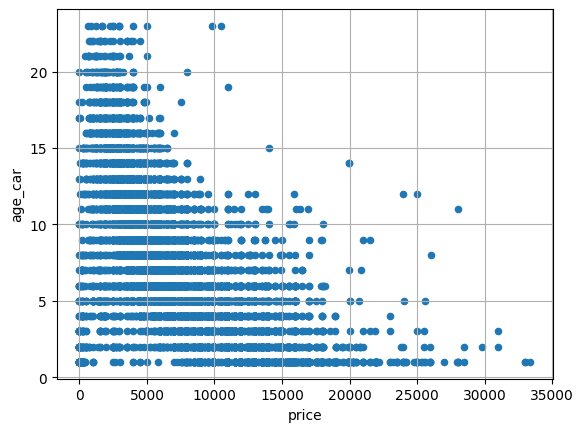

In [74]:
df_sedan.plot(x='price', y='age_car', grid=True, kind='scatter')

<Axes: xlabel='price', ylabel='odometer'>

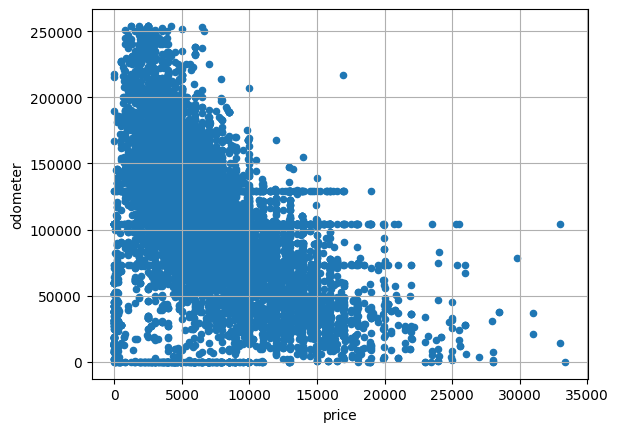

In [75]:
df_sedan.plot(x='price', y='odometer', grid=True, kind='scatter')

<Axes: xlabel='price', ylabel='condition_category'>

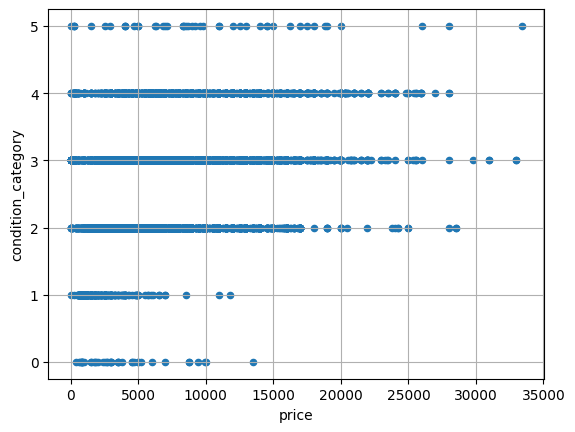

In [76]:
df_sedan.plot(x='price', y='condition_category', grid=True, kind='scatter')

In [77]:
df_sedan['transmission'].value_counts()

automatic    11286
manual         575
other          132
Name: transmission, dtype: int64

Text(0.5, 1.0, 'correlation between price and transmission')

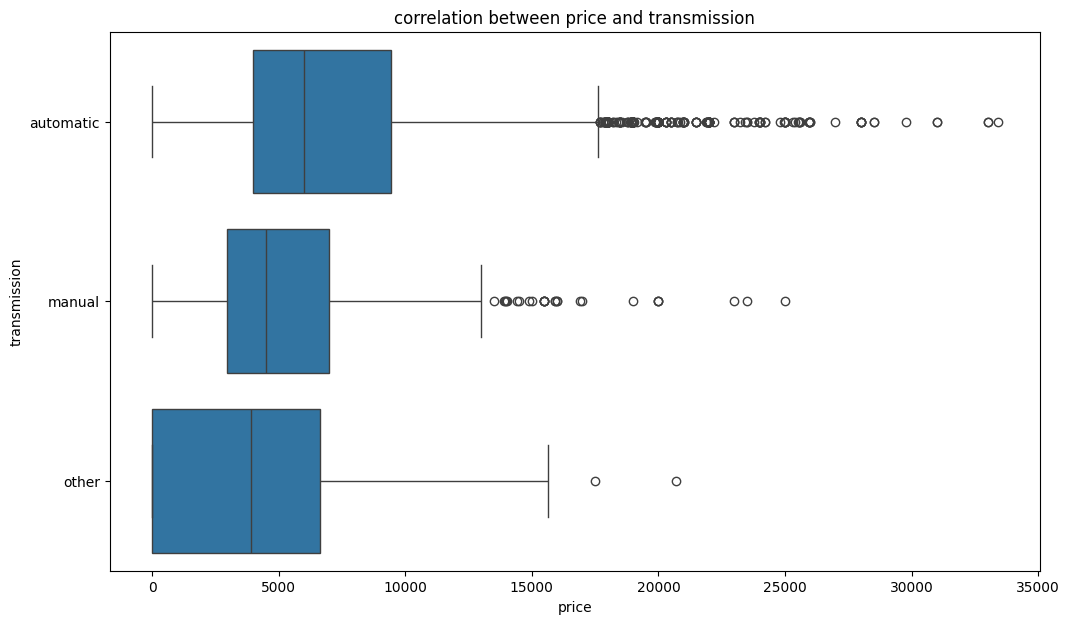

In [78]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan, x='price', y='transmission')
plt.title('correlation between price and transmission')

In [79]:
df_sedan['paint_color'].value_counts()

unknow    2159
silver    2030
black     1757
grey      1608
white     1485
blue      1218
red        934
custom     296
brown      251
green      202
purple      23
yellow      21
orange       9
Name: paint_color, dtype: int64

In [80]:
list(df_sedan['paint_color'].value_counts()[:-3].index)

['unknow',
 'silver',
 'black',
 'grey',
 'white',
 'blue',
 'red',
 'custom',
 'brown',
 'green']

In [81]:
list_include_colors = list(df_sedan['paint_color'].value_counts()[:-3].index)

In [82]:
df_sedan_colors = df_sedan[df_sedan['paint_color'].isin(list_include_colors)].reset_index(drop=True)

Text(0.5, 1.0, 'correlation between price and paint color')

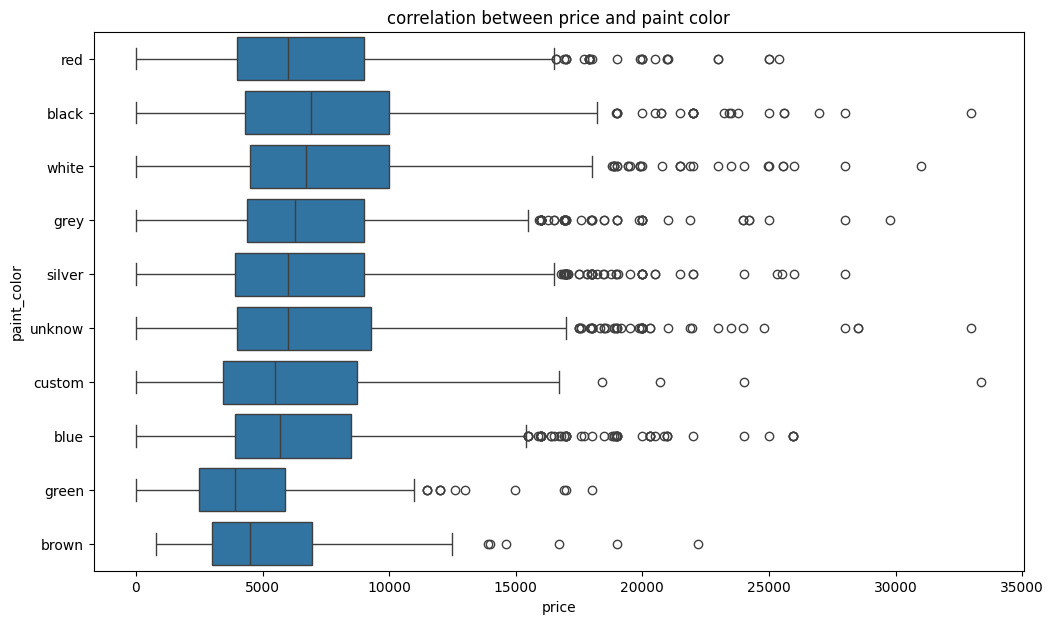

In [83]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan_colors, x='price', y='paint_color')
plt.title('correlation between price and paint color')

When delving into the data surrounding sedans, a vehicle type cherished for its practicality and comfort, an intriguing narrative emerges from the analysis. Through the lens of boxplots and scatterplots, we journey to understand how various factors—age, mileage, condition, transmission type, and color—play their parts in shaping a vehicle's price. Surprisingly, these elements, which one might intuitively expect to hold sway over the pricing, seem to dance to a different tune. They do not significantly influence the price of sedans, painting a picture that challenges conventional wisdom.

However, amid this ensemble of factors, the vehicle's year stands out, asserting a more pronounced effect on the price. This insight is akin to finding a thread in a complex tapestry that, once pulled, begins to unravel the mystery of sedan pricing. The year of manufacture, serving as a proxy for the vehicle's age hints at an underlying trend where newer models tend to command higher prices. This could be attributed to advancements in technology, safety features, fuel efficiency, and the perceived value of newer models in the eyes of consumers.

In [84]:
# Create data from SUV
df_SUV = new_df_4[new_df_4['type']=='SUV'].reset_index(drop=True)

In [85]:
df_SUV.shape

(11853, 19)

In [86]:
df_SUV.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer,condition_category
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknow,True,2018-06-23,19,23,6,2018,7,20714,2
1,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,7,1,2019,6,18245,3
2,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknow,True,2018-07-16,19,16,7,2018,6,17362,3
3,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,15,2,2019,11,13381,3
4,12990,2009,gmc yukon,excellent,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,31,1,2019,10,13228,3


In [87]:
df_SUV.corr()['price'].sort_values(ascending=False)

price                 1.000000
model_year            0.575562
avg_odometer          0.271478
condition_category    0.259289
cylinders             0.004078
day_posted            0.000907
year_posted           0.000075
month_posted         -0.006629
days_listed          -0.020703
odometer             -0.485386
age_car              -0.575325
is_4wd                     NaN
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='age_car'>

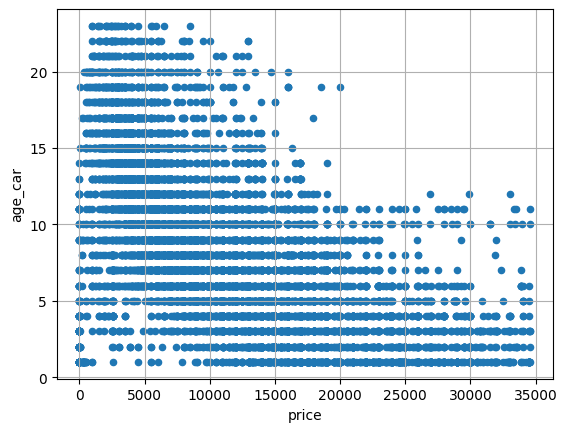

In [88]:
df_SUV.plot(x='price', y='age_car', grid=True, kind='scatter')

<Axes: xlabel='price', ylabel='odometer'>

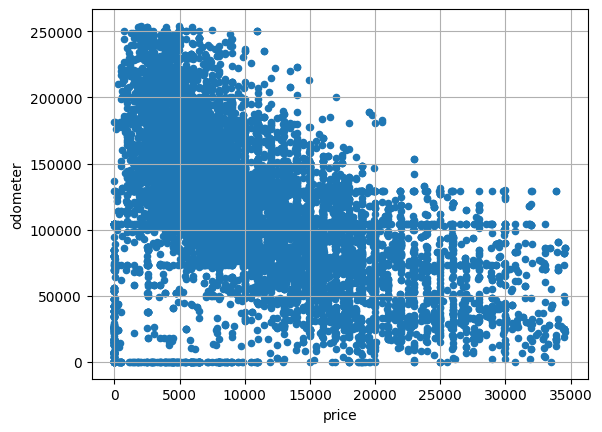

In [89]:
df_SUV.plot(x='price', y='odometer', grid=True, kind='scatter')

<Axes: xlabel='price', ylabel='condition_category'>

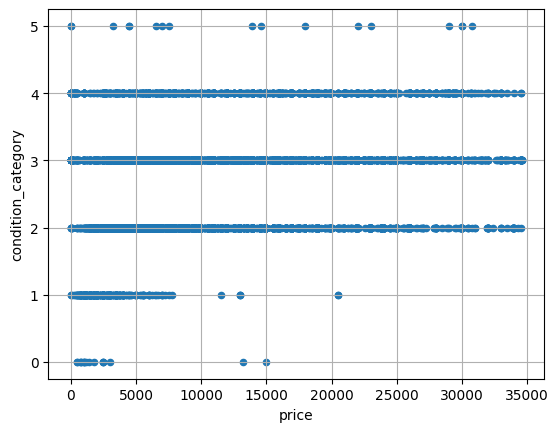

In [90]:
df_SUV.plot(x='price', y='condition_category', grid=True, kind='scatter')

Text(0.5, 1.0, 'correlation between price and transmission')

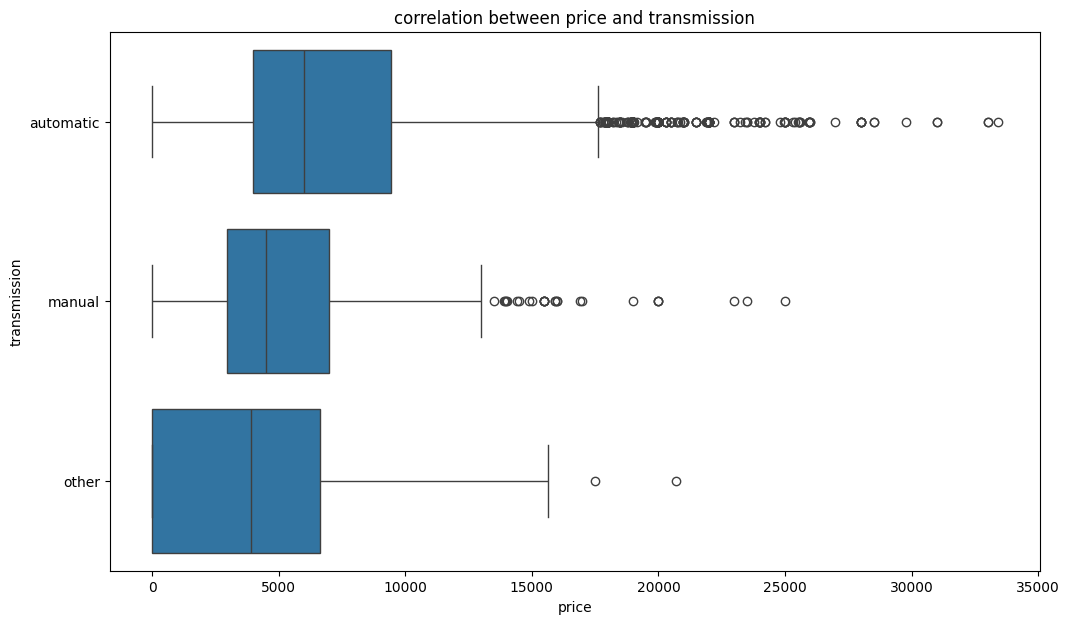

In [91]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan, x='price', y='transmission')
plt.title('correlation between price and transmission')

In [92]:
list_include_colors_SUV = list(df_SUV['paint_color'].value_counts()[:-3].index)

In [93]:
df_SUV_colors = df_SUV[df_SUV['paint_color'].isin(list_include_colors_SUV)].reset_index(drop=True)

Text(0.5, 1.0, 'correlation between price and paint color')

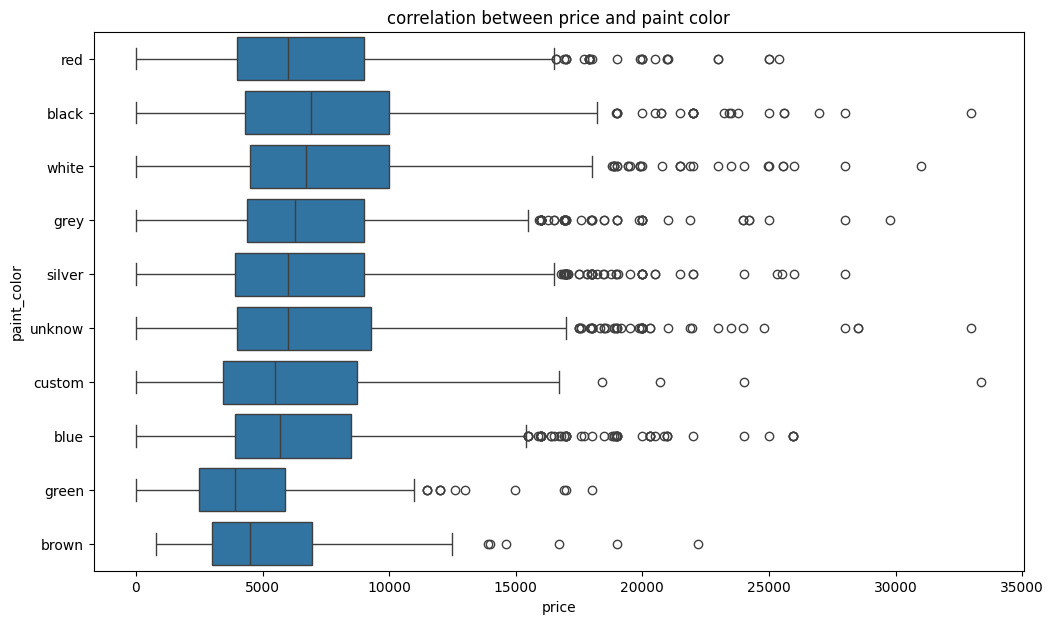

In [94]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan_colors, x='price', y='paint_color')
plt.title('correlation between price and paint color')

Exploring the data on SUVs, a vehicle class that has risen in popularity for its versatility and spaciousness, reveals intriguing patterns and relationships. The story that unfolds from boxplots and scatterplots is a compelling narrative about what influences the price of an SUV and, perhaps more interestingly, what doesn't.

At first glance, one might assume that the age of the vehicle, its mileage, its condition, the type of transmission, and even its color would play significant roles in determining its market value. These are, after all, the factors that many consumers take into account when evaluating a vehicle. Yet, the data tells a different story. These factors, while important in many respects, do not show a strong direct correlation with the price of SUVs. This revelation challenges our preconceptions and prompts us to look deeper into what influences SUV prices.

The narrative takes a fascinating turn when we examine the relationship between the vehicle's year of manufacture and its price. Here, we find a discernible pattern: newer models tend to be priced higher than their older counterparts. This trend is not merely about the passage of time but speaks volumes about the evolution of the SUV category itself. Newer models often come equipped with the latest technological innovations, advanced safety features, improved fuel efficiency, and enhanced design aesthetics. These advancements reflect the automotive industry's response to growing consumer demands for more environmentally friendly, safer, and more comfortable vehicles.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# Conclusion

In the intricate tapestry of the vehicle marketplace, every thread – from the vehicle's year and model to its condition and color – intertwines to create a complex picture of what drives value. At Crankshaft List, our mission has been to unravel this picture and dissect the myriad factors that coalesce to shape vehicle pricing and listing behaviors. Through diligent data analysis, we've embarked on a journey not just to chart the landscape but to illuminate paths for buyers and sellers alike, enhancing the clarity and efficiency of their transactions.

**The Analysis:**

Our dataset is a treasure trove of details about vehicles listed for sale – encompassing everything from the basics like price, year, and model, to more nuanced attributes like condition, cylinders, fuel type, mileage, transmission, color, and whether the vehicle has four-wheel drive. Marketing-related data adds another layer, capturing when each listing was posted and the duration it remained active until removal.

However, the path to insights was not without obstacles. Missing values and data type discrepancies initially clouded our analysis. Through meticulous data preprocessing, we cleansed and corrected our dataset, replacing missing values with representative numbers and aligning each piece of data with its correct type. This groundwork was crucial, transforming our dataset into a clean slate, ready for in-depth examination.

Our exploration delved into the core parameters presumed to influence vehicle prices – age, mileage, cylinder count, and condition. We juxtaposed these parameters against outliers to understand their true impact on pricing. Our selection criteria for in-depth analysis were straightforward: focus on vehicle types with the highest listing volumes and examine their price relationships with age, mileage, condition, transmission type, and color.

**The Revelations:**

Contrary to conventional wisdom, our analysis revealed a surprising disconnection between vehicle prices and several factors one might intuitively consider influential – the vehicle's age, mileage, condition, transmission type, and color showed no strong correlation with price. Instead, a singular, compelling relationship emerged: the vehicle's year of manufacture exhibited a clear influence on its price. This suggests that while traditional metrics of value assessment remain important in the eyes of consumers, the age of the vehicle, as denoted by its manufacture year, is a more definitive indicator of its market value.

**Narrative Conclusion:**

The insights gleaned from our analysis at Crankshaft List go beyond mere numbers and correlations. They invite us to reconsider our assumptions about what factors truly drive vehicle value in the marketplace. The clear linkage between manufacture year and price underscores the importance of technological advancements, safety improvements, and design evolutions that accumulate over time, enhancing a vehicle's appeal and, consequently, its market value.

**The Road Ahead:**

Our journey through the data does not end here. Armed with these findings, the next steps involve deeper dives into specific vehicle categories, examining how these trends play out across different segments and models. Additionally, exploring the impact of emerging technologies, particularly in electric and hybrid vehicles, will be crucial in understanding future pricing trends.
Moreover, we plan to expand our analysis to include external factors such as economic conditions, regulatory changes, and shifts in consumer preferences, providing a holistic view of the forces shaping the vehicle marketplace.

In conclusion, our analysis at Crankshaft List has not only shed light on the complex dynamics of vehicle pricing but also paved the way for future explorations aimed at enriching the marketplace experience for buyers and sellers alike. Through data, we seek to demystify the factors that drive vehicle value, empowering our community with the knowledge to make informed, confident decisions in their vehicle transactions.